<a href="https://colab.research.google.com/github/AlineLataro/Desafio_Alura_TelecomX2/blob/main/TeleconX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📡 TELECOM X - PARTE 2  

##  ANÁLISE PREDITIVA DE CANCELAMENTO  

### 🎯 MISSÃO  
Desenvolver modelos de classificação para identificar clientes com maior propensão ao cancelamento, permitindo que a empresa atue de forma preventiva e reduza a taxa de **churn**.  

---

### 🔎 OBJETIVOS DA ETAPA  
- Preparar os dados para modelagem (**tratamento, encoding e normalização**).  
- Realizar **análise de correlação** e seleção de variáveis relevantes.  
- Treinar e comparar diferentes **algoritmos de classificação**.  
- Avaliar os modelos por meio de **métricas adequadas**.  
- Interpretar os resultados, destacando as **variáveis mais influentes**.  
- Gerar **recomendações estratégicas** baseadas nas evidências obtidas.  

---

### 🛠 ATIVIDADES REALIZADAS  
✅ Pré-processamento dos dados para Machine Learning.  
✅ Construção, teste e validação de modelos preditivos.  
✅ Análise de importância das variáveis e interpretação dos resultados.  
✅ Comunicação clara dos achados, com foco na aplicação estratégica.  


## 📌 EXTRAÇÃO

Para iniciar análise, importado os dados da API da Telecom X. Esses dados estão disponíveis no formato CSV e contêm as informações já tratadas.

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_telecomX-1.csv')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Total.Day,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97,0013-EXCHZ,Yes


In [64]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Total.Day', 'customerID', 'Churn'],
      dtype='object')

## PREPARAÇÃO DOS DADOS

# 🎯Remoção de Colunas Irrelevantes
Durante o pré-processamento, eliminamos colunas de IDs, estimativas e valores duplicados em outras variáveis. Essas informações não possuem valor preditivo para o problema de churn e, além disso, poderiam introduzir ruído ou comprometer o desempenho dos modelos de classificação.

In [65]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [66]:
# COLUNAS
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Total.Day', 'customerID', 'Churn'],
      dtype='object')

In [67]:
# VER ESTRUTURA GERAL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [68]:
#REMOVENDO COLUNAS IRRELEVANTES
df = df.drop(columns=['customerID'])

## 🎯 Encoding

Foi realizada a identificação dos valores únicos de cada coluna com o objetivo de compreender a distribuição das variáveis categóricas. Em seguida, essas variáveis foram convertidas para formato numérico, assegurando compatibilidade com os algoritmos de machine learning. Para essa transformação, utilizou-se o one-hot encoding, método adequado para preservar a representatividade das categorias sem introduzir viés na modelagem.

In [71]:
# para criar um novo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sem dummy trap)
categorical_cols = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Pronto para usar!
df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Total.Day,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.20,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,2.01,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.34,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.17,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.97,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.84,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.55,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.30,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [72]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Charges.Monthly                        7043 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Total.Day                              7032 non-null   float64
 5   Churn_Yes                              7043 non-null   bool   
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [73]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,11
Total.Day,11
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [75]:
# Verifica valores nulos nas duas colunas
print(df_encoded[['Total.Day', 'Charges.Total']].isnull().sum())

Total.Day        11
Charges.Total    11
dtype: int64


In [77]:
# Remove linhas com valores nulos nas colunas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'Charges.Total'])

In [78]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Total.Day,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


# 🎯 Correlação e seleção de variáveis

## Análise de Correlação
A matriz de correlação é uma ferramenta importante para identificar as relações entre variáveis numéricas. É essencial observar quais variáveis apresentam maior correlação com a evasão, pois essas tendem a ser fortes candidatas para compor o modelo preditivo.


In [79]:
#CORRELAÇÃO ENTRE AS VARIAVEIS

corr = df_encoded.corr()


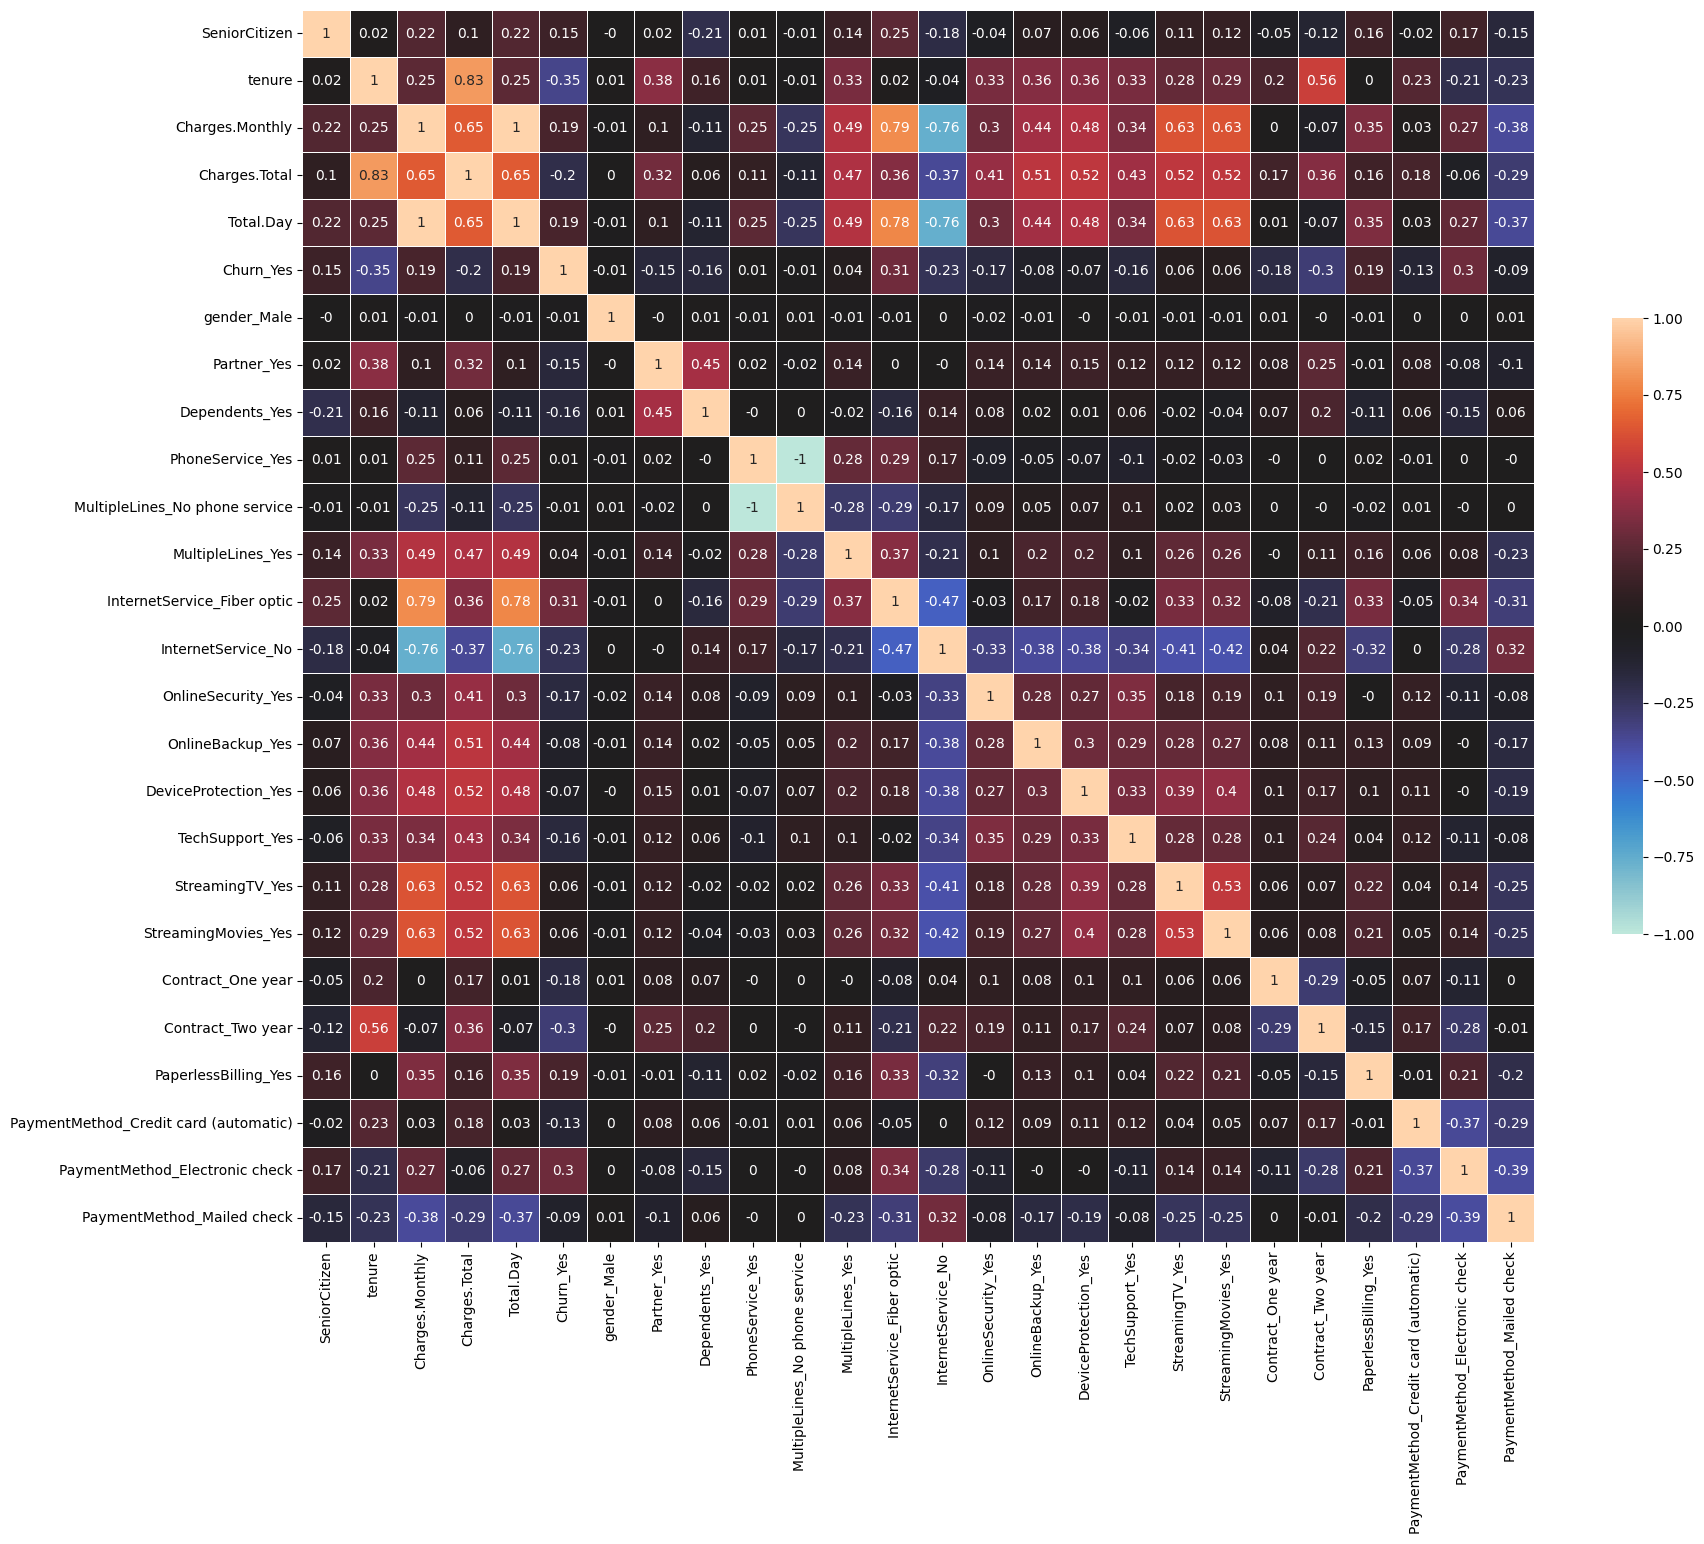

In [80]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

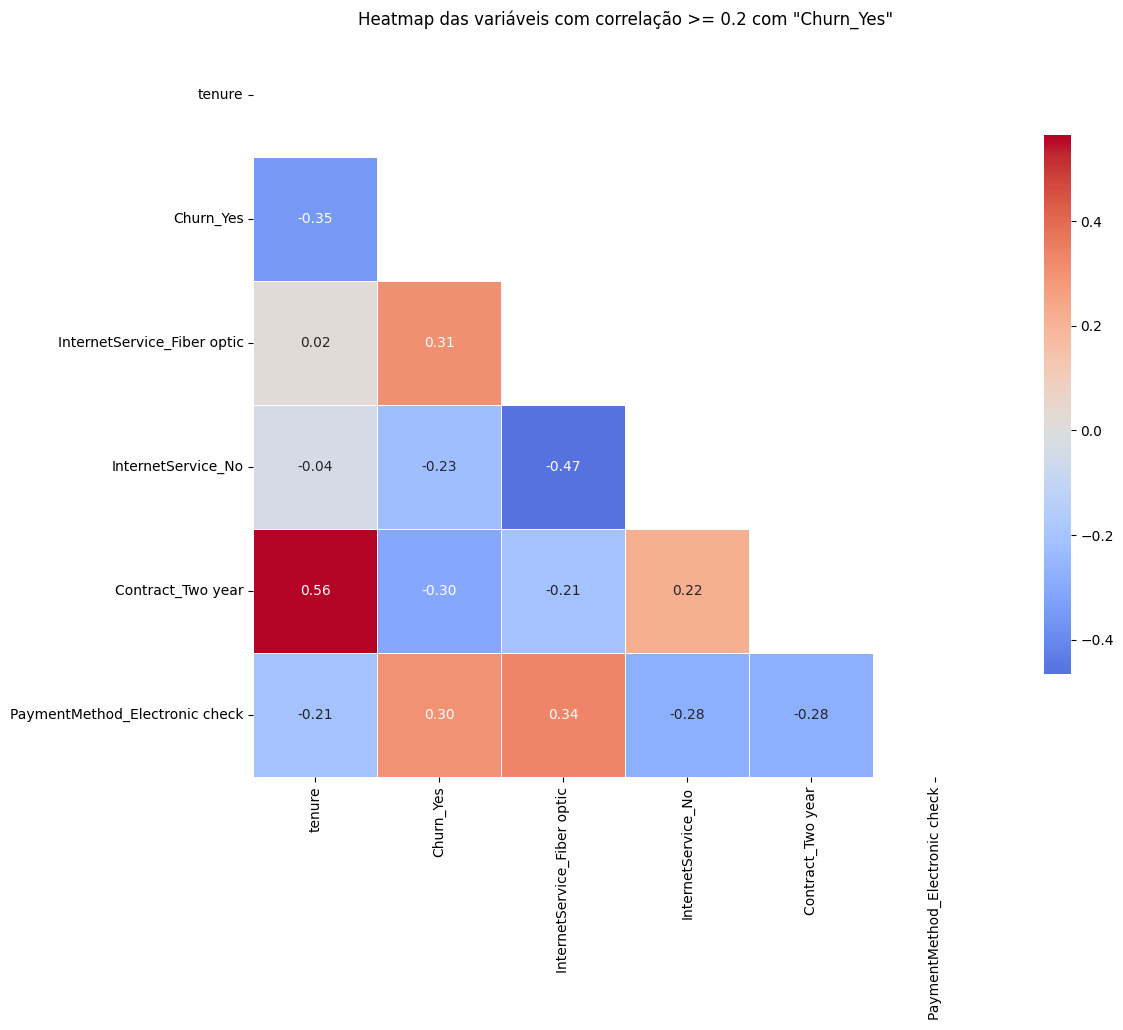

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir a variável alvo
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

# Análise de multicolinearidade

A análise de multicolinearidade é fundamental em projetos de modelagem estatística e de machine learning porque ajuda a garantir que as variáveis explicativas (features) usadas no modelo realmente contribuam de forma independente para explicar o fenômeno estudado.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [83]:
# Aqui, não inclua a variável-alvo (ex: Churn_Yes) no cálculo do VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

In [84]:
# ADICIONANDO CONSTANTE (INTERCEPTO)

X_const = add_constant(X)

In [85]:

# CONVERTENDO COLUNAS BOLEANO EM INTEIRO(0 or 1)
X_const = X_const.astype(float)

# CALCULANDO O VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# EXIBINDO OS RESULTADOS
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,PhoneService_Yes,inf
10,MultipleLines_No phone service,inf
3,Charges.Monthly,992.623632
12,InternetService_Fiber optic,148.504277
5,Total.Day,133.792125
13,InternetService_No,104.217179
19,StreamingMovies_Yes,24.158588
18,StreamingTV_Yes,24.080021
4,Charges.Total,10.871350
2,tenure,7.613525


In [86]:
# VIF REFEITA

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.498367
3,Charges.Monthly,18.168780
4,Charges.Total,10.706800
2,tenure,7.548716
9,InternetService_Fiber optic,6.997820
17,Contract_Two year,2.532131
14,StreamingTV_Yes,2.188547
15,StreamingMovies_Yes,2.187888
20,PaymentMethod_Electronic check,1.967305
21,PaymentMethod_Mailed check,1.847752


In [88]:
# Manter apenas Charges.Monthly
X_filtered.drop(columns=["Charges.Total"], inplace=True)

In [89]:
# FIV 2

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# === Recalcular o VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# === Exibir os resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,Charges.Monthly,17.283226
8,InternetService_Fiber optic,6.936112
2,tenure,2.826197
16,Contract_Two year,2.521228
13,StreamingTV_Yes,2.166619
14,StreamingMovies_Yes,2.163842
19,PaymentMethod_Electronic check,1.964004
20,PaymentMethod_Mailed check,1.825717
12,TechSupport_Yes,1.712098


# Modelagem Preditiva

In [90]:
# IMPORTANDO BIBLIOTECAS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Separação dos dados

In [91]:
# SEPARANDO FEATURES E TARGET

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [92]:
# SEPARANDO TREINO E TESTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Normalização e Balanceamento

In [93]:
# NORMALIZANDO

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# BALANCEANDO O TREINO COM SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Modelos Preditivos

## Modelo Regressão Logística

In [95]:
# REGRESSÃO LOGISTICA

# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



## Modelo Random Forest

In [96]:
# RANDOM FOREST

# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7758293838862559
ROC AUC: 0.8223498801480801
Matriz de Confusão:
 [[1300  249]
 [ 224  337]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



# Análise dos modelos

Analisando os modelos Regressão Logística e Random Forest, verificamos  uma taxa de fidelidade maior do que 80% e uma acurácia maior do de 75%, sendo o modelo de Regressão logistica o modelo com melhor desempenho.